In [1]:
# Import Libraries 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import numpy
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
!pip install geopandas

import geopandas
from shapely.geos import lgeos
import fiona
from shapely.geometry import Polygon
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from math import radians, cos, sin, asin, sqrt

%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Open Earthchem dataset
df = pd.read_csv('/content/drive/MyDrive/earthchem_download_95122.txt', delimiter = "\t")
df

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,MAX AGE,MATERIAL,TYPE,COMPOSITION,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,CR2O3,FE2O3,FE2O3T,FEO,FEOT,NIO,MNO,MGO,CAO,NA2O,K2O,P2O5,BAO,LOI,H2O,H2O_M,H2O_P,SO3,V2O3,ZNO,FE,...,INDIUM,K,LI,MG.1,MN.1,MO,NA,NB,NI.1,P,PB,PD,RB,RE,S.1,SB,SC,SE,SN,SR,TA,TE,TH,TI,TL,U,V,W,Y,ZN.1,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
0,080385-4,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,69.144,0.565,14.590,NaN,NaN,NaN,NaN,4.261,NaN,0.081,1.111,3.544,4.402,2.141,0.162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,11,NaN,18.9,NaN,69.1,NaN,NaN,NaN,11.9,NaN,NaN,190.0,0.50,NaN,8.60,NaN,NaN,NaN,43.0,NaN,42.0,62,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230483-3,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,63.541,0.796,16.427,NaN,NaN,NaN,NaN,5.973,NaN,0.121,1.732,5.136,4.562,1.460,0.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,10,NaN,15.8,NaN,45.6,NaN,NaN,NaN,15.8,NaN,NaN,294.0,0.30,NaN,4.30,NaN,NaN,NaN,76.0,NaN,33.0,101,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PU-02-34,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5088,-72.2060,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,70.931,0.340,13.794,NaN,NaN,NaN,NaN,4.671,NaN,0.140,0.310,1.771,5.182,2.791,0.070,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,27,NaN,14.0,NaN,62.0,NaN,NaN,0.5,NaN,NaN,NaN,138.0,0.47,NaN,8.30,NaN,NaN,2.24,NaN,NaN,53.7,96,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PU-02-25,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5275,-72.1812,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,70.047,0.688,14.039,NaN,NaN,NaN,NaN,4.367,NaN,0.110,0.638,2.154,5.195,2.612,0.150,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.9,NaN,NaN,23.0,NaN,73.0,NaN,NaN,0.7,NaN,NaN,NaN,161.0,0.55,NaN,9.18,NaN,NaN,2.55,14.0,NaN,54.7,119,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PU-02-20,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5675,-72.1743,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,69.367,0.531,14.150,NaN,NaN,NaN,NaN,5.167,NaN,0.150,0.471,2.213,5.167,2.664,0.120,NaN,< 0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7,NaN,NaN,32.0,NaN,66.0,NaN,NaN,0.7,NaN,NaN,NaN,197.0,0.48,NaN,8.82,NaN,NaN,2.37,NaN,NaN,39.8,144,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,DBF-03-05,NaN,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",NaN,-18.1958,-69.2527,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,64.904,0.834,16.277,NaN,NaN,NaN,NaN,3.854,NaN,0.061,1.801,3.835,4.568,3.540,0.326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3059,DBF04-6,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1928,-69.2434,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,DBF04-5,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1929,-69.2433,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:

# Drop Silica
df.dropna(subset=['SIO2'])

# Drop columns with less than 50% data 

limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df

,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
0,080385-4,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,69.144,0.565,14.590,4.261,0.081,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.60,282.0
1,230483-3,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,63.541,0.796,16.427,5.973,0.121,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.30,195.0
2,PU-02-34,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5088,-72.2060,0.01,igneous,volcanic,felsic,dacite,70.931,0.340,13.794,4.671,0.140,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.30,307.0
3,PU-02-25,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5275,-72.1812,0.01,igneous,volcanic,felsic,dacite,70.047,0.688,14.039,4.367,0.110,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.18,342.0
4,PU-02-20,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5675,-72.1743,0.01,igneous,volcanic,felsic,dacite,69.367,0.531,14.150,5.167,0.150,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.82,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,DBF-03-05,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",-18.1958,-69.2527,0.01,igneous,volcanic,felsic,dacite,64.904,0.834,16.277,3.854,0.061,1.801,3.835,4.568,3.540,0.326,NaN,NaN,NaN,NaN,NaN
3059,DBF04-6,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",-18.1928,-69.2434,0.01,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,DBF04-5,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",-18.1929,-69.2433,0.01,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061,CHO 099,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.3014,-69.2431,0.01,igneous,volcanic,felsic,dacite,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.00,101.0


In [5]:

# Plotting 4 separated samples

target = {#'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          #'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          #'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
          'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          #'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6,
          'RUPRECHT, P.; BERGANTZ, G. W.; COOPER, KARI M.; HILDRETH, R. A., 2012':7,
          #'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          #'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          'GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO; LOPEZ-ESCOBAR, L., 1988':10
          }

#df = pd.read_csv('earthchem_download_95122.txt', delimiter = "\t")
limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df.columns

data_four = df

data_four['target']= data_four['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_four['target'] = data_four['target'].fillna(0)
# Make target column int
data_four['target'] = data_four['target'].astype(float).astype(int)

# Drop targets that are not the 4 references
data_four = data_four[data_four['target'] >=1]
data_four



,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR,target
186,CG 81A,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,68.089,0.531,16.421,2.904,0.04,1.111,3.304,3.805,3.605,0.19,436.0,204.8,338.9,17.9,148.9,2
187,REAL GRANDE WHITE,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,77.440,0.150,12.539,0.752,0.03,0.110,0.853,2.307,5.818,NaN,NaN,NaN,NaN,NaN,NaN,2
188,MIDDLE MERIHUACA GREY,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,78.932,0.110,12.405,0.310,0.03,0.040,0.770,1.701,5.702,NaN,NaN,NaN,NaN,NaN,NaN,2
191,MIDDLE MERIHUACA WHITE,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,77.684,0.150,13.097,0.340,0.03,0.060,0.940,2.300,5.399,NaN,NaN,NaN,NaN,NaN,NaN,2
192,PITAS WHITE,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,77.431,0.120,12.805,0.240,0.01,0.040,0.850,2.601,5.902,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,CG 125,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,70.000,0.540,14.900,2.800,0.05,1.110,2.700,3.100,4.600,0.20,506.0,253.9,269.7,28.6,169.7,2
3029,CG 140,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,69.921,0.610,14.804,3.001,0.05,1.190,2.801,3.401,4.001,0.22,282.1,255.7,264.1,30.8,169.0,2
3030,CG 218,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,70.393,0.590,14.599,2.900,0.05,1.160,2.600,3.300,4.200,0.21,253.5,325.2,243.7,31.1,179.8,2
3031,CG 227B,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8536,-66.8245,0.01,igneous,volcanic,felsic,rhyodacite,68.945,0.610,15.288,2.998,0.05,1.219,2.698,3.197,4.796,0.20,592.5,258.0,295.7,34.0,213.3,2


In [6]:
features = ['LATITUDE', 'LONGITUDE', 'SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR', 'target']

data_four= data_four.dropna()

X = data_four[features]
X = X.drop(['target'],axis = 1)
y = data_four['target']
y.unique()

array([ 2, 10,  7,  5])

In [7]:
# Using the Haversine formula to combine long lat into a single value 
from math import radians, cos, sin, asin, sqrt
def single_pt_haversine(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a)) 

    return d

y = X.loc[:,['LONGITUDE','LATITUDE']]
pd.DataFrame([[45.0, 120.0], [60.0, 30.0]], columns=['x', 'y'])

y['harvesine_distance'] = [single_pt_haversine(LONGITUDE, LATITUDE) for LONGITUDE, LATITUDE in zip(y.LONGITUDE, y.LATITUDE)]
y


,LONGITUDE,LATITUDE,harvesine_distance
186,-67.2100,-25.9800,7741.618582
197,-67.2100,-25.9800,7741.618582
198,-67.2100,-25.9800,7741.618582
201,-67.2100,-25.9800,7741.618582
205,-67.2100,-25.9800,7741.618582
...,...,...,...
3027,-66.8100,-25.8500,7699.648260
3029,-66.8100,-25.8500,7699.648260
3030,-66.8100,-25.8500,7699.648260
3031,-66.8245,-25.8536,7701.148058


In [8]:
all_data = X

location = y['harvesine_distance']
all_data = all_data.join(location)

all_data = all_data.drop(columns = ['LATITUDE','LONGITUDE'])
all_data

,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR,harvesine_distance
186,68.089,0.531,16.421,2.904,0.04,1.111,3.304,3.805,3.605,0.19,436.0,204.8,338.9,17.9,148.9,7741.618582
197,69.675,0.539,15.073,2.795,0.05,1.088,2.496,2.795,5.290,0.20,496.1,278.2,266.2,25.0,159.2,7741.618582
198,69.965,0.570,15.292,2.999,0.05,1.009,2.299,3.198,4.398,0.22,504.7,247.3,256.5,28.5,178.7,7741.618582
201,69.977,0.471,15.117,2.603,0.05,1.011,2.503,3.103,5.006,0.16,587.9,233.8,285.9,21.8,155.5,7741.618582
205,70.207,0.460,15.402,2.400,0.04,0.910,2.500,3.300,4.600,0.18,407.3,258.8,260.4,23.1,133.6,7741.618582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,70.000,0.540,14.900,2.800,0.05,1.110,2.700,3.100,4.600,0.20,506.0,253.9,269.7,28.6,169.7,7699.648260
3029,69.921,0.610,14.804,3.001,0.05,1.190,2.801,3.401,4.001,0.22,282.1,255.7,264.1,30.8,169.0,7699.648260
3030,70.393,0.590,14.599,2.900,0.05,1.160,2.600,3.300,4.200,0.21,253.5,325.2,243.7,31.1,179.8,7699.648260
3031,68.945,0.610,15.288,2.998,0.05,1.219,2.698,3.197,4.796,0.20,592.5,258.0,295.7,34.0,213.3,7701.148058


In [9]:
y_new = y
y = y.drop(columns = ['LONGITUDE','LATITUDE'])
y_new

,LONGITUDE,LATITUDE,harvesine_distance
186,-67.2100,-25.9800,7741.618582
197,-67.2100,-25.9800,7741.618582
198,-67.2100,-25.9800,7741.618582
201,-67.2100,-25.9800,7741.618582
205,-67.2100,-25.9800,7741.618582
...,...,...,...
3027,-66.8100,-25.8500,7699.648260
3029,-66.8100,-25.8500,7699.648260
3030,-66.8100,-25.8500,7699.648260
3031,-66.8245,-25.8536,7701.148058


In [10]:
features = ['LATITUDE', 'LONGITUDE', 'SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR', 'target']

data_four= data_four.dropna()

X = data_four[features]
X = X.drop(['target'],axis = 1)
#y = data_four['target']
X.drop(['LATITUDE',"LONGITUDE"],axis = 1)



,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
186,68.089,0.531,16.421,2.904,0.04,1.111,3.304,3.805,3.605,0.19,436.0,204.8,338.9,17.9,148.9
197,69.675,0.539,15.073,2.795,0.05,1.088,2.496,2.795,5.290,0.20,496.1,278.2,266.2,25.0,159.2
198,69.965,0.570,15.292,2.999,0.05,1.009,2.299,3.198,4.398,0.22,504.7,247.3,256.5,28.5,178.7
201,69.977,0.471,15.117,2.603,0.05,1.011,2.503,3.103,5.006,0.16,587.9,233.8,285.9,21.8,155.5
205,70.207,0.460,15.402,2.400,0.04,0.910,2.500,3.300,4.600,0.18,407.3,258.8,260.4,23.1,133.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,70.000,0.540,14.900,2.800,0.05,1.110,2.700,3.100,4.600,0.20,506.0,253.9,269.7,28.6,169.7
3029,69.921,0.610,14.804,3.001,0.05,1.190,2.801,3.401,4.001,0.22,282.1,255.7,264.1,30.8,169.0
3030,70.393,0.590,14.599,2.900,0.05,1.160,2.600,3.300,4.200,0.21,253.5,325.2,243.7,31.1,179.8
3031,68.945,0.610,15.288,2.998,0.05,1.219,2.698,3.197,4.796,0.20,592.5,258.0,295.7,34.0,213.3


In [11]:
# Split train test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_new['harvesine_distance'],
                                                    test_size=0.2,
                                                    random_state=42,)

# Our X variable = elemental data
# Our y variable = single point Haversine location
print('Labels counts in y:', np.bincount(y_new['harvesine_distance']))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

print(len(y_train))
print(len(y_test))

Labels counts in y: [ 0  0  0 ...  0  0 25]
Labels counts in y_train: [ 0  0  0 ...  0  0 17]
Labels counts in y_test: [0 0 0 ... 0 0 8]
128
32


In [12]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc = StandardScaler()
sc.fit(X_test)
X_test_std = sc.transform(X_test)

In [13]:
# PCA on Train
pca = PCA()
principalComponents = pca.fit_transform(X_train)
print(len(principalComponents))

128


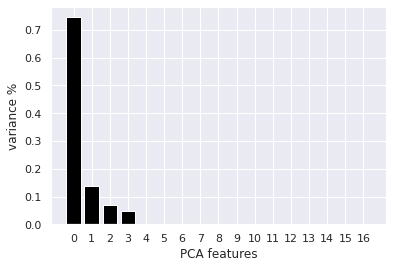

In [14]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

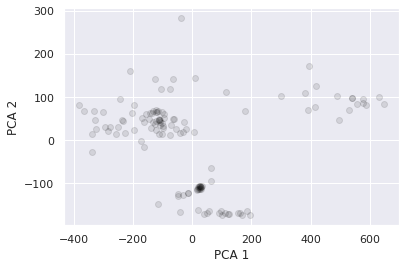

In [15]:
# Scatter plot of the first two components of the PCA model.
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

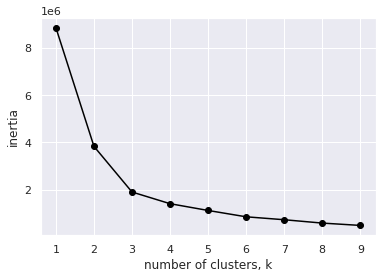

In [16]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

128

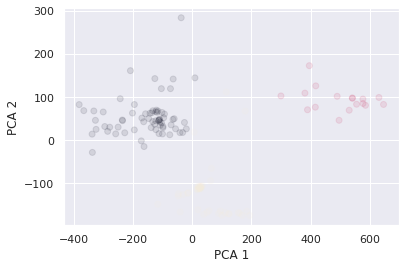

In [17]:
# Kmeans on our scaled data using 3 clusters

model= KMeans(n_clusters = 3)
model.fit(PCA_components)
PCA_components

# Labeling the clusters
y_new_train = model.labels_

# Cluster centers
model.cluster_centers_

# Plotting our data using Kmeans to separate into 3 clusters w/target ( 'Kmeans_cluster')
# Scatter plot of the first two components of the PCA model.
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1,c=y_new_train)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
len(y_new_train)

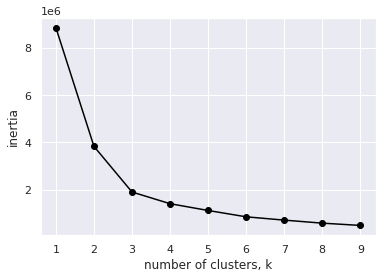

In [18]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [19]:
# PCA on Test
pca = PCA()
principalComponents = pca.fit_transform(X_test)
print(len(principalComponents))

32


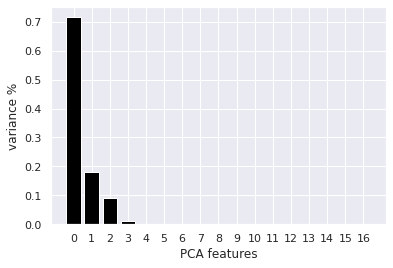

In [20]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

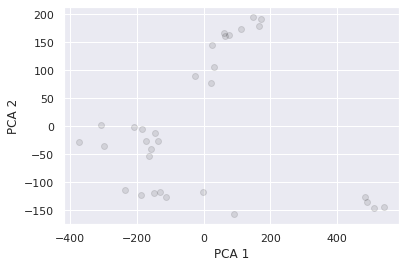

In [21]:
# Scatter plot of the first two components of the PCA model.
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

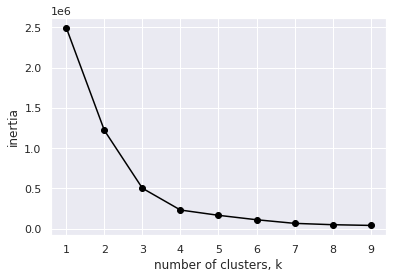

In [22]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

128

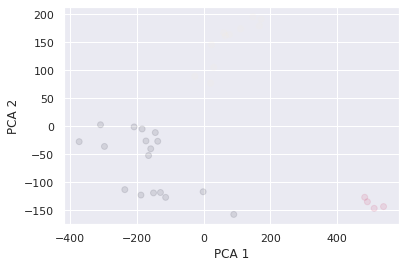

In [23]:
# Kmeans on our scaled data using 3 clusters

model= KMeans(n_clusters = 3)
model.fit(PCA_components)
PCA_components

# Labeling the clusters
y_new_test = model.labels_

# Cluster centers
model.cluster_centers_

# Plotting our data using Kmeans to separate into 3 clusters w/target ( 'Kmeans_cluster')
# Scatter plot of the first two components of the PCA model.
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1,c=y_new_test)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
len(y_new_train)

In [24]:
#y_new_train = pd.DataFrame(y_new_train)
#y_new_test = pd.DataFrame(y_new_test)

print('Training Features Shape:', X_train.shape)
#print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
#print('Testing Labels Shape:', y_test.shape)

print('Training Labels Shape:', y_new_train.shape)
print('Testing Labels Shape:', y_new_test.shape)


Training Features Shape: (128, 17)
Testing Features Shape: (32, 17)
Training Labels Shape: (128,)
Testing Labels Shape: (32,)


In [25]:
# Replacing 0 clusters with another number 

y_new_train = np.where(y_new_train==0, 3, y_new_train) 
y_new_test = np.where(y_new_test==0, 3, y_new_test) 

y_new_train = y_new_train.astype(int)
y_new_test =  y_new_test.astype(int)


In [33]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
#rf.fit(X_train, y_train);
rf.fit(X_train, y_new_train);

In [34]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_train)

# Calculate the absolute errors
errors = abs(predictions - y_new_train)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_new_train))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.02 degrees.
Accuracy: 98.69 %.


In [35]:
# Plotting the tree

# Saving feature names for later use
feature_list = list(X.columns)

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_new_train)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');#

In [36]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: RB                   Importance: 0.46
Variable: BA                   Importance: 0.3
Variable: TH                   Importance: 0.17
Variable: FEOT                 Importance: 0.02
Variable: TIO2                 Importance: 0.01
Variable: AL2O3                Importance: 0.01
Variable: ZR                   Importance: 0.01
Variable: MNO                  Importance: 0.0
Variable: NA2O                 Importance: 0.0
Variable: K2O                  Importance: 0.0


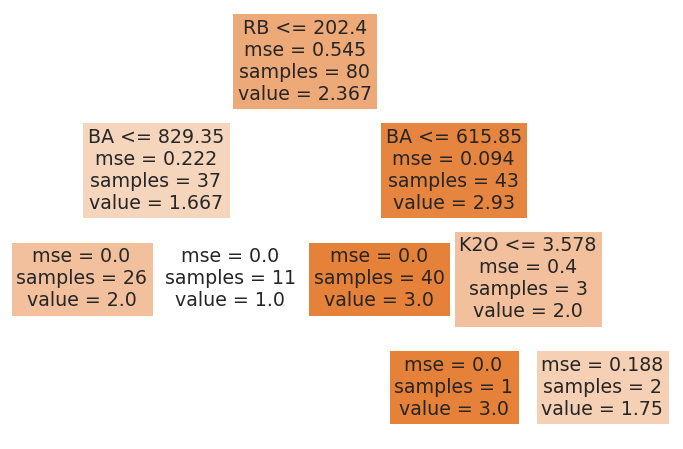

In [37]:
# Limit depth of tree to 3 levels
rf = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf.fit(X_train, y_new_train)

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
# Tree plot
_ = tree.plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True)


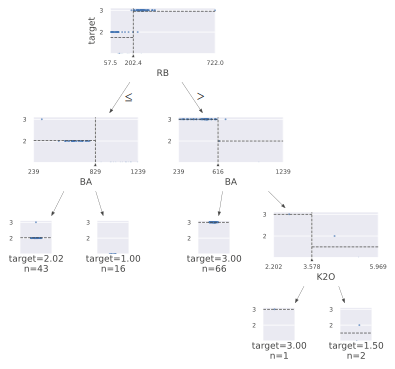

In [38]:
viz = dtreeviz(rf.estimators_[0], X_train, y_new_train, feature_names=feature_list, target_name='target')
viz

In [40]:
new_features = ['TIO2', 'AL2O3', 'FEOT', 'MNO','NA2O', 'K2O',  'BA', 'RB', 'TH', 'ZR', ]
X = X[new_features]

# Split train test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_new['harvesine_distance'],
                                                    test_size=0.2,
                                                    random_state=42,)

# Our X variable = elemental data
# Our y variable = single point Haversine location
print('Labels counts in y:', np.bincount(y_new['harvesine_distance']))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [ 0  0  0 ...  0  0 25]
Labels counts in y_train: [ 0  0  0 ...  0  0 17]
Labels counts in y_test: [0 0 0 ... 0 0 8]


In [44]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc = StandardScaler()
sc.fit(X_test)
X_test_std = sc.transform(X_test)

In [45]:
# Train
pca = PCA()
principalComponents = pca.fit_transform(X_train)
print(len(principalComponents))

128


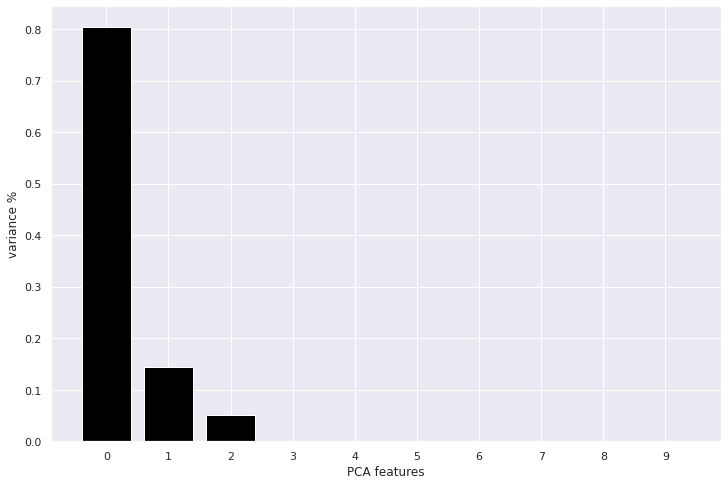

In [46]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

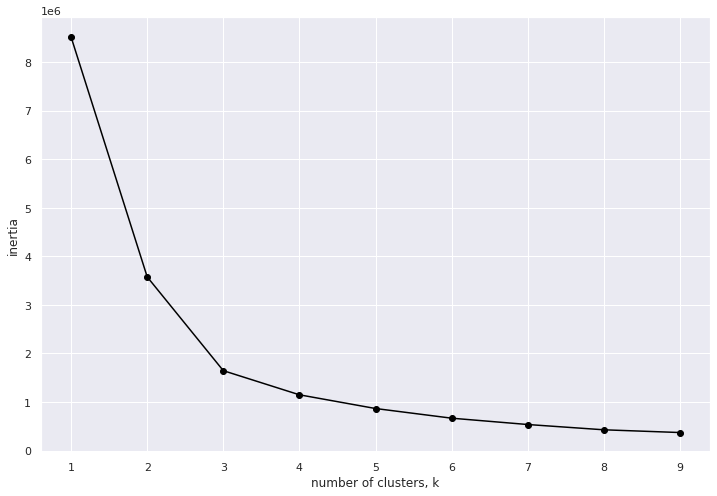

In [47]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Text(0, 0.5, 'PCA 2')

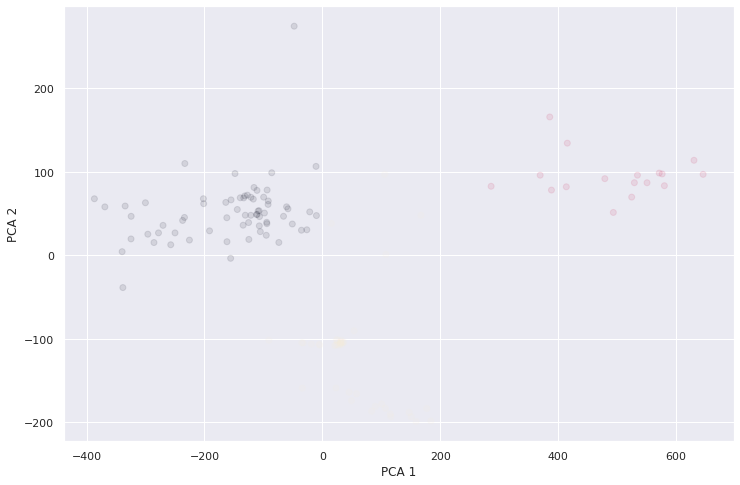

In [48]:
# Kmeans on our scaled data using 3 clusters

model= KMeans(n_clusters = 3)
model.fit(PCA_components)
PCA_components

# Labeling the clusters
y_new_train = model.labels_

# Cluster centers
model.cluster_centers_

# Plotting our data using Kmeans to separate into 3 clusters w/target ( 'Kmeans_cluster')
# Scatter plot of the first two components of the PCA model.
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1,c=y_new_train)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [49]:
#y_new_train = pd.DataFrame(y_new_train)
#y_new_test = pd.DataFrame(y_new_test)

print('Training Features Shape:', X_train.shape)
#print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
#print('Testing Labels Shape:', y_test.shape)

print('Training Labels Shape:', y_new_train.shape)
print('Testing Labels Shape:', y_new_test.shape)


Training Features Shape: (128, 10)
Testing Features Shape: (32, 10)
Training Labels Shape: (128,)
Testing Labels Shape: (32,)


In [50]:
# Replacing 0 clusters with another number 

y_new_train = np.where(y_new_train==0, 3, y_new_train) 
y_new_test = np.where(y_new_test==0, 3, y_new_test) 

y_new_train = y_new_train.astype(int)
y_new_test =  y_new_test.astype(int)


In [52]:
# Testing data random forest

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_new_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [53]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_new_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_new_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.1 degrees.
Accuracy: 96.56 %.


In [56]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: RB                   Importance: 0.53
Variable: TH                   Importance: 0.24
Variable: BA                   Importance: 0.11
Variable: TIO2                 Importance: 0.04
Variable: ZR                   Importance: 0.04
Variable: AL2O3                Importance: 0.02
Variable: K2O                  Importance: 0.02
Variable: NA2O                 Importance: 0.01
Variable: FEOT                 Importance: 0.0
Variable: MNO                  Importance: 0.0


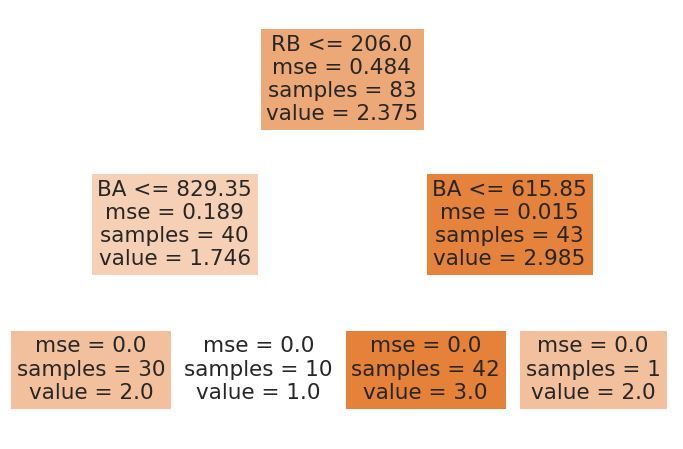

In [57]:
# Limit depth of tree to 3 levels
rf = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf.fit(X_train, y_new_train)

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
# Tree plot
_ = tree.plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True)


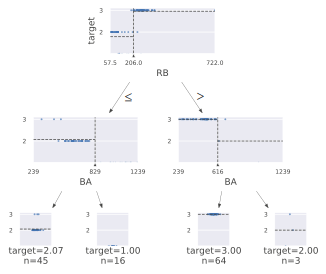

In [58]:
viz = dtreeviz(rf.estimators_[0], X_train, y_new_train, feature_names=feature_list, target_name='target')
viz

32


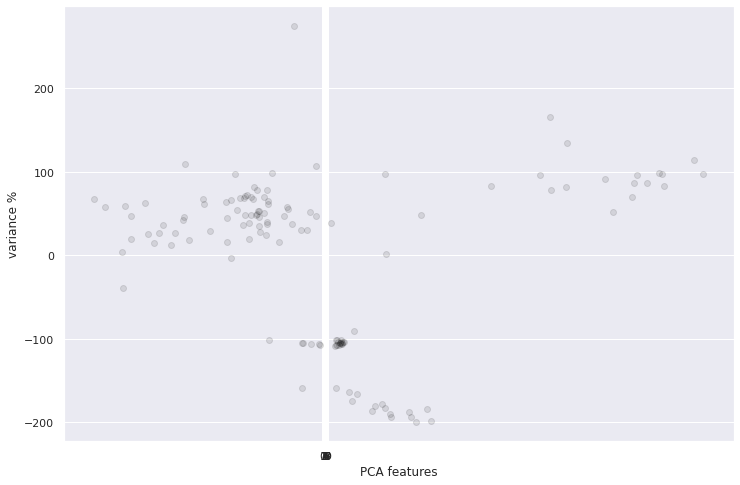

In [59]:
# Test
pca = PCA()
principalComponents = pca.fit_transform(X_test)
print(len(principalComponents))

# Scatter plot of the first two components of the PCA model.
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

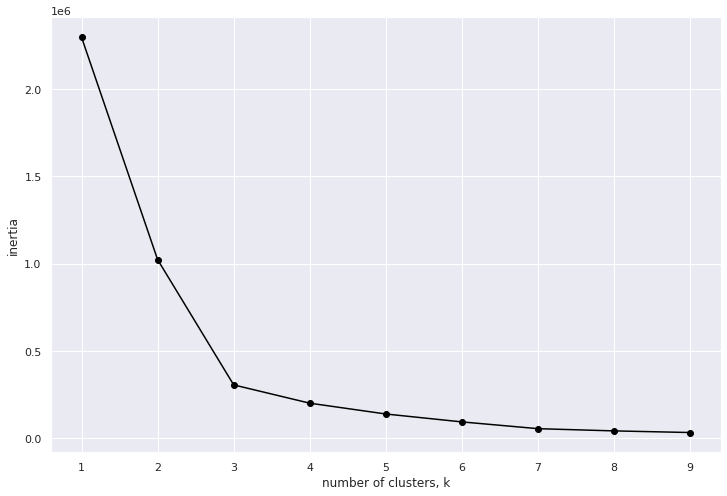

In [60]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Text(0, 0.5, 'PCA 2')

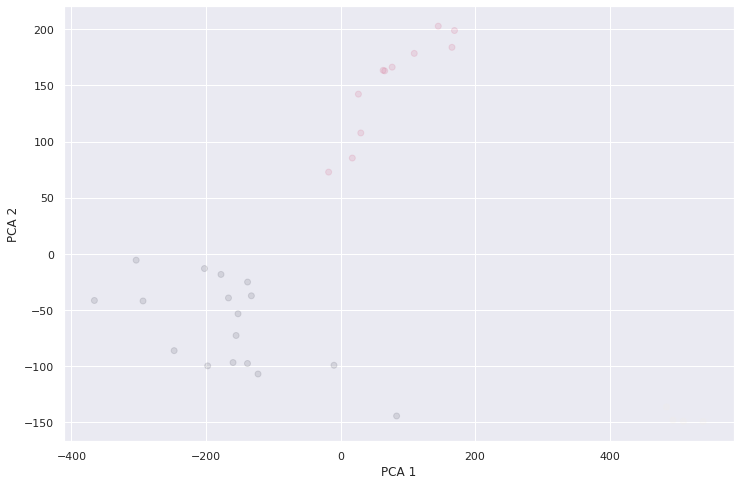

In [61]:
# Kmeans on our scaled data using 3 clusters

model= KMeans(n_clusters = 3)
model.fit(PCA_components)
PCA_components

# Labeling the clusters
y_new_test = model.labels_

# Cluster centers
model.cluster_centers_

# Plotting our data using Kmeans to separate into 3 clusters w/target ( 'Kmeans_cluster')
# Scatter plot of the first two components of the PCA model.
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1,c=y_new_test)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [62]:
#y_new_train = pd.DataFrame(y_new_train)
#y_new_test = pd.DataFrame(y_new_test)

print('Training Features Shape:', X_train.shape)
#print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
#print('Testing Labels Shape:', y_test.shape)

print('Training Labels Shape:', y_new_train.shape)
print('Testing Labels Shape:', y_new_test.shape)


Training Features Shape: (128, 10)
Testing Features Shape: (32, 10)
Training Labels Shape: (128,)
Testing Labels Shape: (32,)


In [63]:
# Replacing 0 clusters with another number 

y_new_train = np.where(y_new_train==0, 3, y_new_train) 
y_new_test = np.where(y_new_test==0, 3, y_new_test) 

y_new_train = y_new_train.astype(int)
y_new_test =  y_new_test.astype(int)


In [65]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
#rf.fit(X_train, y_train);
rf.fit(X_test, y_new_test);

In [66]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = ['RB','BA']
train_important = X_train[important_indices]
test_important = X_test[important_indices]

# Train the random forest
rf_most_important.fit(train_important, y_train)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - y_new_test)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_new_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 8054.32 degrees.
Accuracy: -478193.28 %.


In [67]:
# Plotting the tree

# Saving feature names for later use
feature_list = list(X.columns)

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_test, y_test)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');#

In [68]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: RB                   Importance: 0.34
Variable: TH                   Importance: 0.33
Variable: NA2O                 Importance: 0.11
Variable: ZR                   Importance: 0.06
Variable: BA                   Importance: 0.05
Variable: MNO                  Importance: 0.04
Variable: K2O                  Importance: 0.04
Variable: FEOT                 Importance: 0.02
Variable: TIO2                 Importance: 0.01
Variable: AL2O3                Importance: 0.0
